### Introduction to visualization

The usual imports and we want to use `PathTreeBuilder` and `MoveTreeBuilder`.

In [1]:
%matplotlib inline
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder, PathTreeBuilder
from IPython.display import SVG, HTML
import openpathsampling.visualize as visualization

Let's load some data from our usual suspects the toy simulation.

In [2]:
st = paths.Storage('mstis.nc', mode='r')

Retrieve the move scheme and one of the transitions:

In [3]:
scheme = st.schemes[0]
transition = scheme.network.sampling_transitions[0]

In [4]:
print transition

TISTransition: Out C
C -> C or all states except C
Interface: 0.0<opC<0.04
Interface: 0.0<opC<0.09
Interface: 0.0<opC<0.16



In [5]:
transition.stateB.name

u'all states except C'

In [6]:
import openpathsampling.visualize as v

In [550]:
heritage = tree.construct_heritage(st.samples[len(st.samples) - 2])

In [125]:
reload(v)

<module 'openpathsampling.visualize' from '/Users/jan-hendrikprinz/Studium/git/openpathsampling/openpathsampling/visualize.py'>

In [126]:
tree = v.PathTreeBuilder()

In [127]:
q = v.SampleList(heritage)

In [128]:
q.flip_time_direction = False

In [129]:
q.analyze()

In [130]:
subt = q[5].trajectory.shared_subtrajectory(q[6].trajectory)

In [131]:
q.decorrelated_trajectories

[Trajectory[56], Trajectory[104], Trajectory[162], Trajectory[177]]

In [132]:
q.correlation[0:5]

[0.0, 0.9107142857142857, 1.0, 0.0, 0.0]

In [133]:
for s in q[0:5]:
    print q.index(s), hex(id(s)), '->', q.parent(s) if q.parent(s) is not None else '-', hex(id(q[q.parent(s)])) if q.parent(s) is not None else '0x000000000'

0 0x1233043d0 -> - 0x000000000
1 0x123304390 -> 0 0x1233043d0
2 0x123304350 -> 1 0x123304390
3 0x123304310 -> 2 0x123304350
4 0x1233042d0 -> 3 0x123304310


Now build a PathTreeBuilder using the storage with some settings and showing some states.
Blue is `stateA` and should be the first and last frame only unless the trajectory crosses to `stateB`
The Interfaces are indicated by shades of red. 

Finally the number in the snapshot references the stored index of associated configuration holding the coordinates.

In [216]:
st.set_caching_mode('analysis')

In [219]:
paths.AnalysisStorage.cache_for_analysis(st)

In [672]:
reload(v)
tree = v.PathTreeBuilder()
tree.states = {
    'blue': transition.stateA,
    'gray': transition.stateB,
}

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = st.idx
tree.op = lambda snap : str(st.idx(snap))[-2:]
tree.op = lambda snap: '+'
tree.op = None

heritage = tree.construct_heritage(st.samples[len(st.samples) - 1])
q = v.SampleList(heritage)
q.analyze()
tree.samples = q
tree.options.css['scale_y'] = 20
tree.options.css['scale_x'] = 2
tree.use_storage_indices(st)
tree.options.movers['default']['new'] = 'block'
tree.options.movers['default']['overlap'] = 'none'

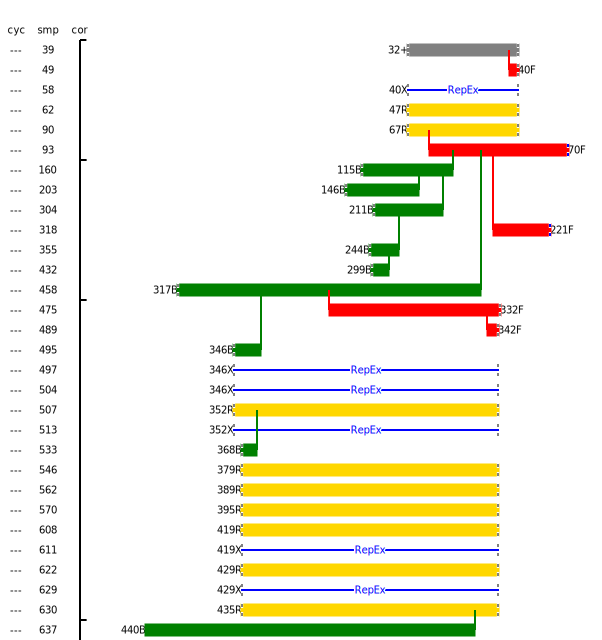

In [673]:
tree.options.css['width'] ='100%'
tree.samples.flip_time_direction = False
tree.samples.analyze()
SVG(tree.svg())

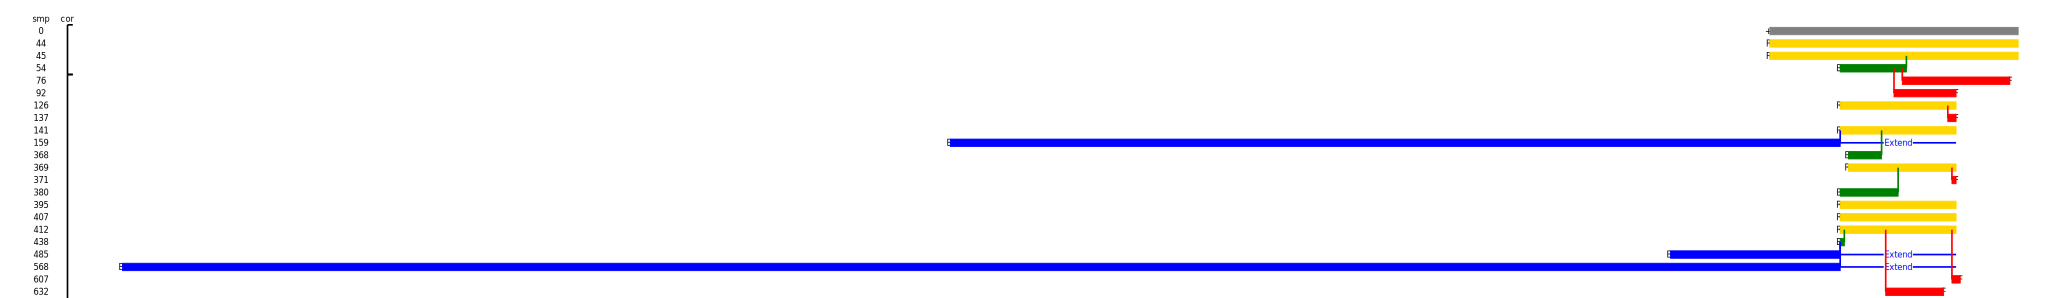

In [779]:
reload(v)
tree = v.PathTreeBuilder()
tree.samples = v.SampleList.from_steps(st.steps[10:], 0, True)
tree.samples.flip_time_direction = False
tree.samples.time_symmetric = True

tree.samples = tree.samples.without_redundant()
tree.options.movers['default']['new'] = 'block'
#tree.options.movers['default']['overlap'] = 'single'

tree.states = {}
tree.options.css['width'] = '100%'
tree.use_storage_indices(st)
#tree.op = st.idx
SVG(tree.svg())

Next is the movetreebuilder

In [636]:
reload(visualization)
movevis = visualization.MoveTreeBuilder()

This shows the full movepath of all steps (right now this disables and only shows the first step!)

In [637]:
movevis.set_ensembles(scheme.ensembles_for_move_tree())
movevis.set_mover(scheme.root_mover)

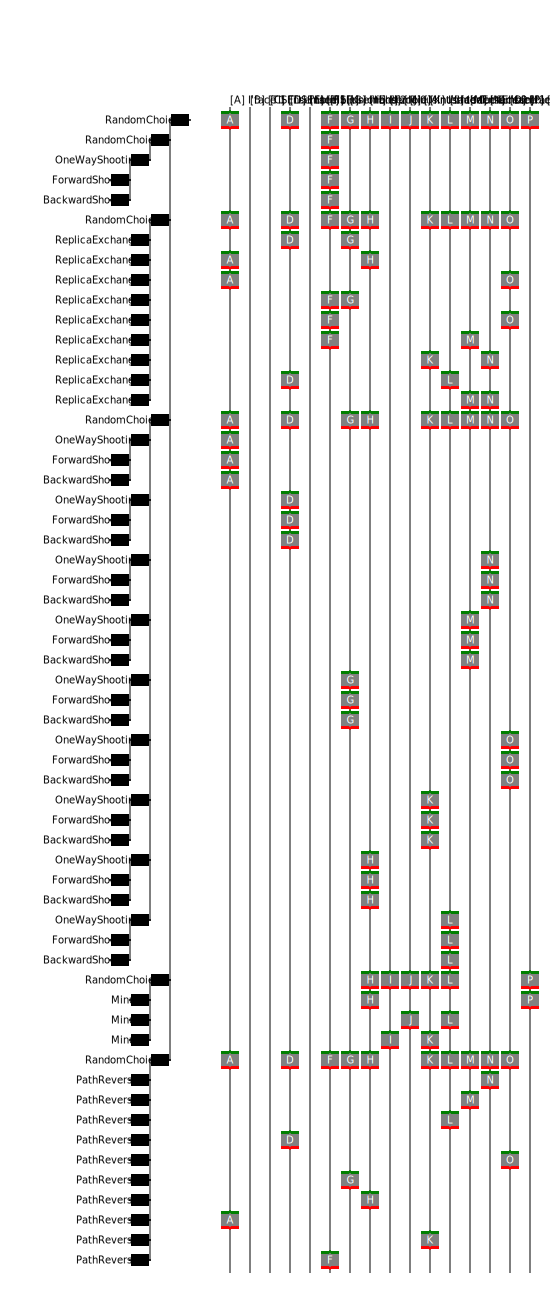

In [643]:
movevis.options.analysis['only_canonical'] = True
SVG(movevis.svg())